# Assignment 4

Linda Koine, Jens Weidmann, Markus Wiktorin

# 1

In [1]:
from IPython.display import Image
Image("mindmap.png")

# 2
## Rectangles

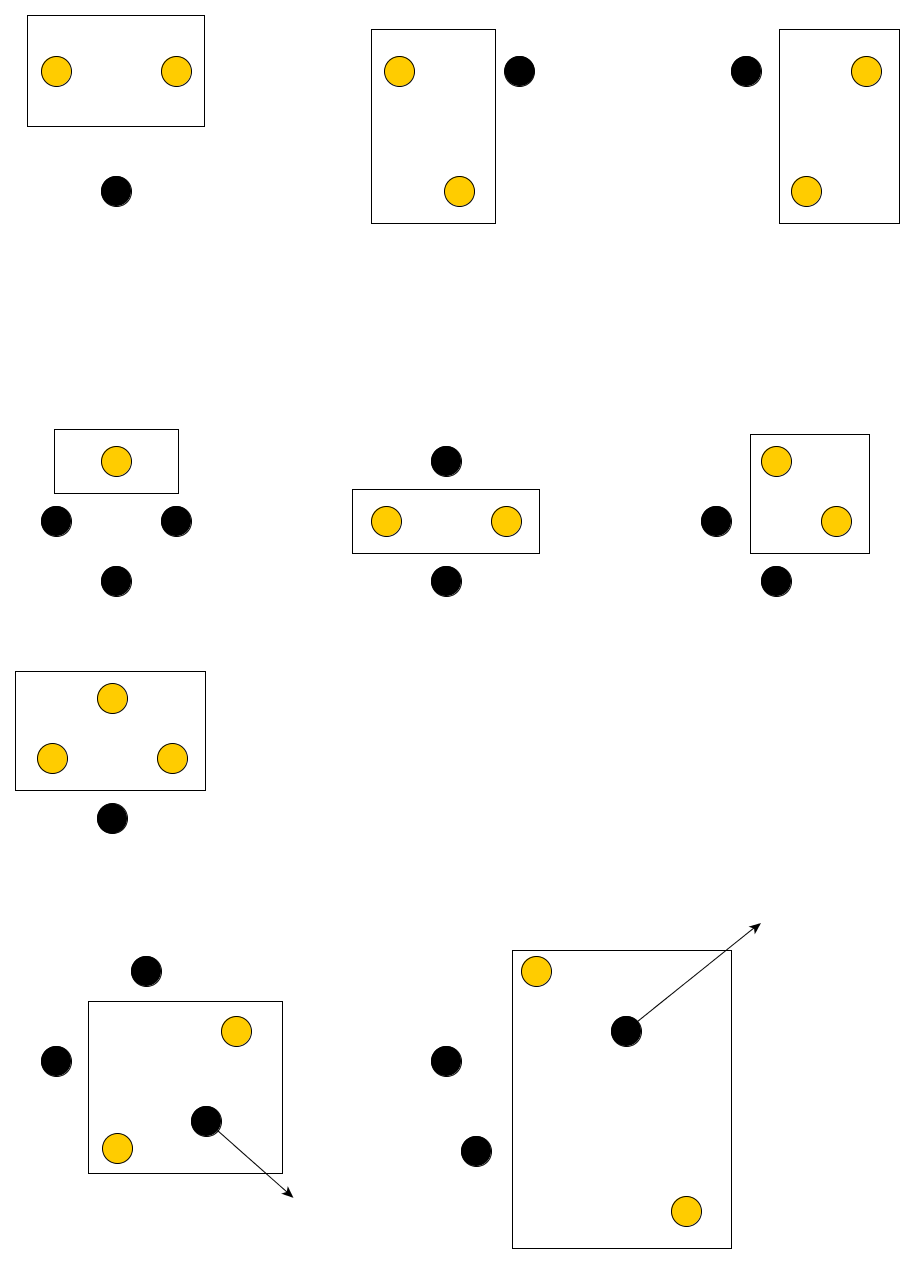

In [2]:
from IPython.display import Image
Image("rectangle.png")

In the previous image we can see that the VC-Dimension of a rectangle is 4.
The first row shows that three dots can always be seperated.
For two dots this is also trivial.
The second rows shows the same for 4 dots.
If we arrange them like in the picture we can sepearate any combination.
For 5 dots we run into a problem.
We can always pick two dots which will have another point in the bounding rectangle.
If we then move the point out we can always find two other for which the same happens.
Wen can therefore not seperate all cominations of 5 dots with a rectangle.

## Circles

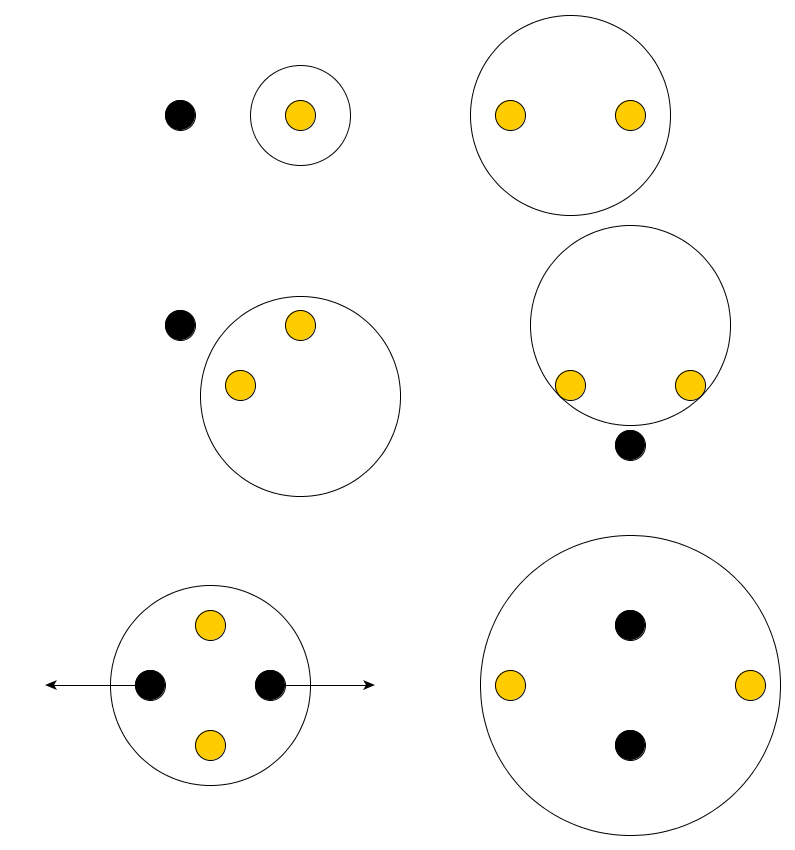

In [3]:
from IPython.display import Image
Image("circle.png")

Seperating one and two points with a circle is trivial.
For two points it is shown in the first row of the image.
Three points can also always be seperated, like it is shown in the second row.
For four points we can always construct a problem.
If take only the two opposite points to be in the circle then we might have to move the other points, as it is shown in the bottom left image.
Then we can pick the two dots which we moved and we have the same problem.
The VC-Dimension of a circle is therefore 3.

## Triangles

In [4]:
from IPython.display import Image
Image("triangle7.png")

If we use a triangle we have to arrange our points in a circle.
With this technique it is possible to seperate all combinations of up to seven points.
For one, two and three points it is always easy to find a triangle which bounds the points.
If we pick four points to be in the triangle we can have up to three edges which are needed to seperate the three other points from the four which should be inside.
This is shown in the last figure.
These three edges will then always form the triangle which is needed.
This shows that it is possible for all combinations of seven points.

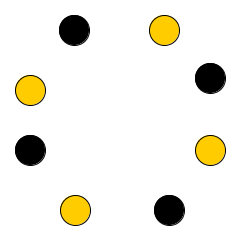

In [5]:
from IPython.display import Image
Image("triangle8.png")

As we can see in the previous image we run into a problem with eight points.
We can pick four points which leads to four edges which we need to seperate the inside points from the outside points.
Four edges cannot form a triangle.
That is why the VC-Dimension of a triangle is 7.

## 3

In [116]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing()

In [134]:
def contains(a,b,c,d,x,y):
    return a <= x < b and c <= y < d

def generate_sample(a,b,c,d):
    x,y = int(np.random.uniform(0,100)),int(np.random.uniform(0,100))
    if contains(a,b,c,d,x,y):
        d = 1
    else:
        d = 0
    return x,y,d
   
def generate_sample_set(a,b,c,d, number_of_samples):
    sample_set = []
    for x in range(number_of_samples):
        sample_set.append(generate_sample(a,b,c,d))
        
    return sample_set

def squash(x):
    if x > 0:
        return 1
    else:
        return 0

def squash_real(x):
    return 1 / (1 + np.exp(-x))

def calc_error(a, b, c, d, samples, w1, w2):
    error = 0
    for s in generate_sample_set(a, b, c, d, samples):
        x = s[0]
        y = s[1]
        desired = s[2]

        res = squash(x * w1 + y * w2)
        error = error + abs(desired - res)
        
    return error / samples

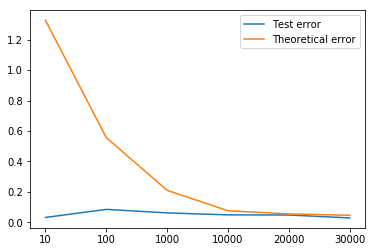

In [170]:
number_rectangles = 10
learning_rate = 0.2
error_calculation_samples = 100
interesting_sample_sizes = [10, 100, 1000, 10000, 20000, 30000]
errors = [0, 0, 0, 0, 0, 0]
h = 4
alpha = 1 - 0.95

for i in range(number_rectangles):
    a = np.random.randint(0,99)
    b = a + np.random.randint(1,99 - (a - 1))
    c = np.random.randint(0,99)
    d = c + np.random.randint(1,99 - (c - 1))

    samples = interesting_sample_sizes[-1]

    w1 = np.random.random()
    w2 = np.random.random()

    counter = 0
    error_index = 0
    for s in generate_sample_set(a, b, c, d, samples):
        x = s[0]
        y = s[1]
        desired = s[2]

        res = squash(x * w1 + y * w2)
        error = desired - res
        w1 = w1 + x * learning_rate * error
        w2 = w2 + y * learning_rate * error
        
        counter = counter + 1
        if counter in interesting_sample_sizes:
            errors[error_index] = errors[error_index] + \
                calc_error(a, b, c, d, error_calculation_samples, w1, w2)
            error_index = error_index + 1

errors = np.array(errors) / number_rectangles
line1, = plt.plot(errors)

theoretical_error = []
for n in interesting_sample_sizes:
    theoretical_error.append(sp.sqrt(h / n * (sp.log(2 * n / h, 2) + 1) - 1 / n * sp.log(alpha, 2)).evalf())
    
line2, = plt.plot(np.array(theoretical_error))
plt.legend([line1, line2], ['Test error', 'Theoretical error'])
_ = plt.xticks(range(len(interesting_sample_sizes)), interesting_sample_sizes)

# 4
## two-input perceptron

VC-dimention of a single layer neuron with two inputs: $h = 3$

90%  confidence that the learned perceptron will have true error of at most 5%

$m \geq (\frac{1}{\epsilon}(4\log_2(\frac{2}{1 - p}) + 8 * h * \log_2(\frac{13}{\epsilon}))$

$\epsilon = 0.05, h = 3, p = 0.9$

find $m$:

In [57]:
h = 3
p = 0.9
e = 0.05

m = 1 / e * (4 * sp.log(2 / (1 - p), 2) + 8 * h * sp.log(13 / e, 2))
m.evalf()

In the previous calculation we can see that we need at least 4197 training samples. This upper bound seems to be too high. 

# 5
## a

As we have seen in 3 the VC-dimension of a rectangle is 4

In [54]:
h = 4
p = 0.95
e = 0.15

m = 1 / e * (4 * sp.log(2 / (1 - p), 2) + 8 * h * sp.log(13 / e, 2))
m.evalf()

We need 1516 samples and there are $\frac{1}{4} * 100 * (100+1)^2 = 255025$

## b

The upper bound does not change if we switch from integers to real values.